In [10]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

from matplotlib import pyplot as plt
import random
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
# connect to Artemis

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-04-10 13:57:10,266 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-04-10 13:57:12,968 | INFO     |: Connected to C0:83:D5:66:86:3C


In [3]:
# test sending and receiving

ble.send_command(CMD.PING, "")

s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [21]:
# disconnect from Artemis
ble.disconnect()

2023-04-08 18:27:02,503 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [90]:
# read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*8
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            TWODist.append((reading[nextPos+5]))
            leftPWM.append((reading[nextPos+6]))
            rightPWM.append((reading[nextPos+7]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
TWODist = []
leftPWM = []
rightPWM = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_PID_DATA, "")

ValueError: Characteristic notifications already started

2023-04-10 13:52:49,785 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [127]:
# PID to given distance and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            error.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
error = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TOF_PID, "304")

['585246', '140', '-171', '0', '0', '-304', '-45', '585262', '175', '-172', '0', '1051', '-304', '-45', '585272', '140', '-171', '0', '1051', '747', '112']
['585297', '141', '-136', '0', '1051', '747', '112', '585308', '143', '-170', '0', '1051', '747', '112', '585323', '174', '-170', '0', '1048', '747', '112']
['585348', '143', '-171', '0', '1048', '744', '111', '585364', '175', '-170', '0', '1048', '744', '111', '585374', '175', '-136', '0', '1047', '744', '111']
['585401', '175', '-168', '0', '1047', '743', '111', '585412', '141', '-171', '0', '1047', '743', '111', '585428', '139', '-136', '0', '1038', '743', '111']
['585450', '145', '-139', '0', '1038', '734', '110', '585468', '139', '-135', '-1', '1038', '734', '110', '585485', '141', '-171', '-1', '1029', '734', '110']
['585507', '138', '-171', '-1', '1029', '725', '108', '585518', '141', '-171', '-1', '1029', '725', '108', '585529', '139', '-135', '-1', '1029', '725', '108']
['585549', '141', '-136', '-1', '1012', '708', '106', 

In [115]:
# PID to given distance and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TOF_PID, "304")

ValueError: Characteristic notifications already started

In [126]:
ble.send_command(CMD.UPDATE_KP, "0.15")

In [125]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

In [134]:
print(len(speed))

291


In [100]:
print(time)

['92711', '92728', '92739', '92765', '92773', '92784', '92806', '92822', '92834', '92856', '92870', '92886', '92921', '92930', '92946', '92967', '92979', '92993', '93015', '93026', '93040', '93065', '93079', '93089', '93114', '93122', '93133', '93158', '93168', '93180', '93204', '93218', '93230', '93252', '93265', '93279', '93309', '93320', '93332', '93355', '93369', '93382', '93407', '93416', '93427', '93455', '93466', '93485', '93502', '93511', '93529', '93554', '93569', '93581', '93594', '93605', '93616', '93639', '93650', '93661', '93683', '93703', '93714', '93741', '93749', '93758', '93775', '93790', '93800', '93826', '93839', '93849', '93870', '93883', '93890', '93913', '93924', '93934', '93950', '93960', '93971', '93993', '94004', '94015', '94039', '94048', '94060', '94081', '94093', '94103', '94127', '94139', '94157', '94181', '94186', '94194', '94213', '94222', '94234', '94256', '94270', '94280', '94302', '94313', '94329', '94348', '94356', '94372', '94399', '94410', '94421', 

In [101]:
print(ONEDist)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [102]:
print(speed)

['-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36'

In [1]:
print(len(time))

NameError: name 'time' is not defined

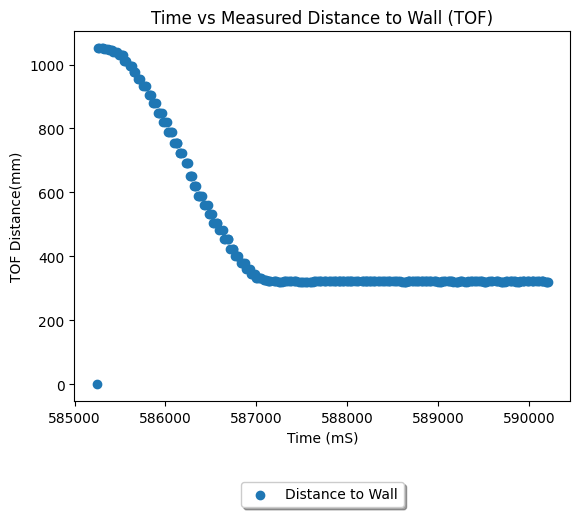

In [131]:
# Plot distance measurement data

intDist = [eval(i) for i in ONEDist]
intTime = [eval(t) for t in time]
plt.scatter(intTime, intDist, label = "Distance to Wall")

plt.title("Time vs Measured Distance to Wall (TOF)")
plt.xlabel("Time (mS)")
plt.ylabel("TOF Distance(mm)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


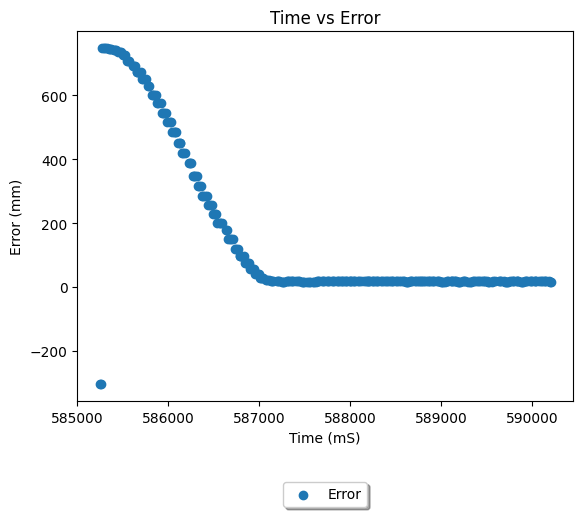

In [132]:
# Plot distance measurement data

intError = [eval(e) for e in error]
intTime = [eval(t) for t in time]
plt.scatter(intTime, intError, label = "Error")

plt.title("Time vs Error")
plt.xlabel("Time (mS)")
plt.ylabel("Error (mm)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


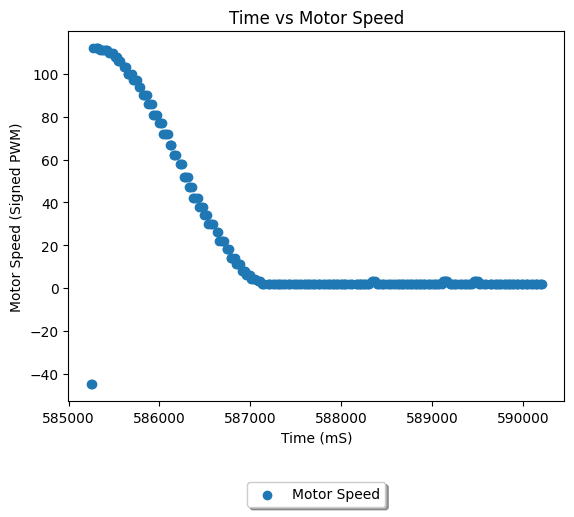

In [133]:
# Plot distance measurement data

intSpeed = [eval(s) for s in speed]
intDist = [eval(i) for i in ONEDist]
intTime = [eval(t) for t in time]
plt.scatter(intTime, intSpeed, label = "Motor Speed")

plt.title("Time vs Motor Speed")
plt.xlabel("Time (mS)")
plt.ylabel("Motor Speed (Signed PWM)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


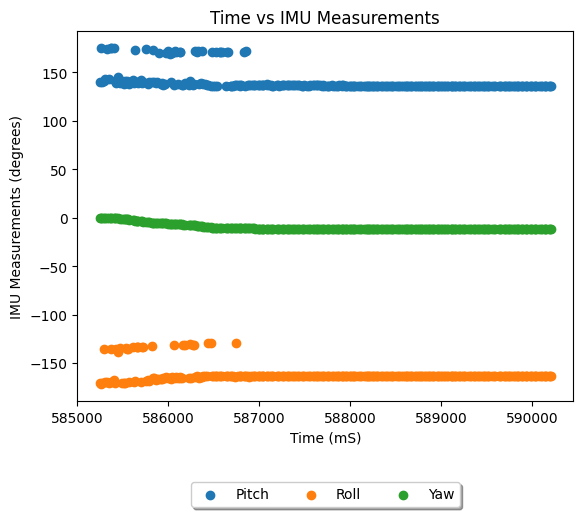

2023-04-10 14:12:37,732 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [130]:
# Plot distance measurement data

intTime = [eval(t) for t in time]
intPitch = [eval(p) for p in pitchC]
intRoll = [eval(r) for r in rollC]
intYaw = [eval(y) for y in yaw]
plt.scatter(intTime, intPitch, label = "Pitch")
plt.scatter(intTime, intRoll, label = "Roll")
plt.scatter(intTime, intYaw, label = "Yaw")

plt.title("Time vs IMU Measurements")
plt.xlabel("Time (mS)")
plt.ylabel("IMU Measurements (degrees)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
